# Maratona de Filmes (SuperComp)

## Relatório Parcial

#### Insper 2023.1
Aluno: Guilherme Rosada


---

### Contextualização

Você quer passar um final de semana assistindo ao máximo de filmes possível, mas há restrições quanto aos horários disponíveis e ao número de títulos que podem ser vistos em cada categoria (comédia, drama, ação, etc).

Entrada: Um inteiro N representando o número de filmes disponíveis para assistir e N trios de inteiros (H[i], F[i], C[i]), representando a hora de início, a hora de fim e a categoria do i-ésimo filme. Além disso, um inteiro M representando o número de categorias e uma lista de M inteiros representando o número máximo de filmes que podem ser assistidos em cada categoria.

Saída: Um inteiro representando o número máximo de filmes que podem ser assistidos de acordo com as restrições de horários e número máximo por categoria.

### Overview do código

O código fonte em questão é um programa em C++ que implementa um algoritmo para agendar a exibição de filmes em um festival de cinema de dois dias, com restrições de categoria e horário. O programa recebe como entrada o número de filmes, o número de categorias, o tamanho máximo de cada categoria e as informações de cada filme (início, fim e categoria). A saída do programa é uma lista ordenada de filmes agendados, bem como o número total de filmes agendados.

O programa começa definindo uma estrutura de dados movie que representa cada filme e contém um identificador, tempo de início e término, e uma categoria. Em seguida, são definidas algumas funções auxiliares. A função read_movies_booking lê as informações dos filmes e as armazena em um vetor de movie. A função sort_book_by_ending_time ordena os filmes por tempo de término, utilizando uma ordenação indireta. A função book_a_movie adiciona um filme à lista de filmes agendados e à lista de categorias agendadas.

A função principal começa lendo as informações de entrada, incluindo o tamanho máximo de cada categoria. Em seguida, o programa lê os filmes e os armazena em um vetor. O vetor de filmes é então ordenado por tempo de término. O programa então itera sobre os filmes, tentando agendar cada um deles. Para cada filme, a função is_movie_available é chamada para determinar se ele pode ser agendado. A função verifica se o filme já foi agendado, se a categoria atingiu o tamanho máximo e se o horário de início do filme atual é maior ou igual ao tempo de término do filme anterior. Se o filme puder ser agendado, ele é adicionado à lista de filmes agendados e ao tempo de término do último filme agendado. O programa itera dessa forma sobre todos os filmes nos dois dias do final de semana.

Ao final, o programa exibe a lista de filmes agendados e o número total de filmes agendados. O programa ainda deixa um comentário para implementar um mapa com os horários alocados para filmes.

O código está bem comentado e organizado, tornando fácil a compreensão da lógica de programação utilizada. No entanto, não há um tratamento de erros para entradas inválidas e o código pode não ser otimizado para grandes conjuntos de dados.

### Heurística Gulosa vs Aleatoriedade

O algoritmo `aleatorio.cpp` diferencia-se da `heuristica.cpp` essencialmente por um fator: a adição de aleatoriedade. Essa é uma etapa no loop de ordenação que sorteia um número aleatoriamente. O número sorteado ditará se a próxima etapa seguirá a heurística gulosa ou se o próximo filme a ser escolhido será ao acaso. A chance de ser aleatório é de 25%, enquanto que a da heurística é de 75%.

# Análise de Desempenho
---

Para analisar o desempenho dos dois algoritmos, podemos utilizar uma variedade de amostras, variando o número N de filmes disponíveis e o número K de categorias.

Para isso, podemos utilizar sistematicamente o arquivo gerador de filmes `gerador`, informando a quantidade de filmes desejada e o número de categorias e utilizar nosso código `heuristica`. Porém, esse processo poderia ser bastante penoso devido à quantidade. 

Isso pode ser simplificado ao executar o código python `generate_input_for_tests.py`

```sh
python3 ./generate_input_for_tests.py

```

o código deverá gerar uma pasta *data* contendo os arquivos de inputs e outputs para teste, bem como os resultados compilados em *results.json*

### Lendo os arquivos de teste

In [29]:
import json

with open("./data/results.json") as f:
    results = json.load(f)
    
lista_filmes = []
lista_categorias = []
lista_tempo = []

# for result in results:
#     lista_filmes.append(result['n'])
#     lista_categorias.append(result['k'])
#     lista_tempo.append(result['time'])

# d = 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results)

categories = df['k'].unique()
categories

array([ 3,  4,  6,  8, 10], dtype=int64)

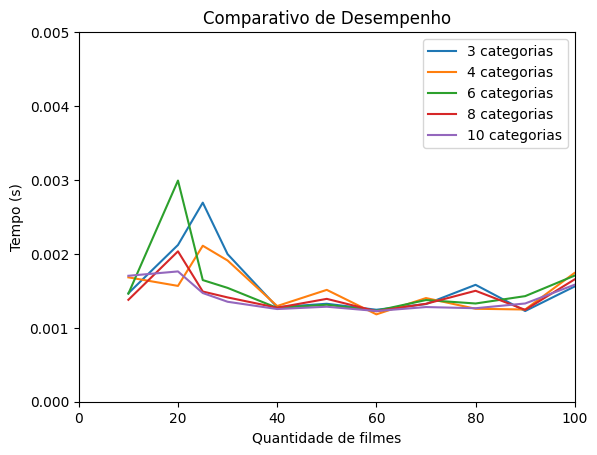

In [55]:
for cat in categories:

    results_by_category = df[df['k'] == cat]
    n_movies = results_by_category['n'].to_list()
    time = results_by_category['time'].to_list()

    plt.plot(n_movies, time, label=f'{cat} categorias')
   
plt.title("Comparativo de Desempenho")
plt.ylabel("Tempo (s)")
plt.xlabel("Quantidade de filmes")
plt.axis([0,100,0,0.005])
plt.legend()